In [114]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [115]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

### Importing the "Leads" Dataset

In [116]:
# Read the dataset
leads = pd.read_csv("Leads.csv")

In [117]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [118]:
#Checking the Shape of dataset
leads.shape

(9240, 37)

In [119]:
# Inspecting the different columns in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [120]:
# Checking the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [121]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As it seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [122]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As it is  clearly seen there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [123]:
# Droping all the columns in which greater than 
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [124]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [125]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

`Mumbai` has highest numbers of leads

As you might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [126]:
# dropping the "City" feature
leads.drop(['City'], axis = 1, inplace = True)

In [127]:
#checking value counts of "Country" column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Highest number of leads from `INDIA`

In [128]:
# dropping the "Country" feature
leads.drop(['Country'], axis = 1, inplace = True)

In [129]:
#Now checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [130]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

### Visualizing the features with `Select` values

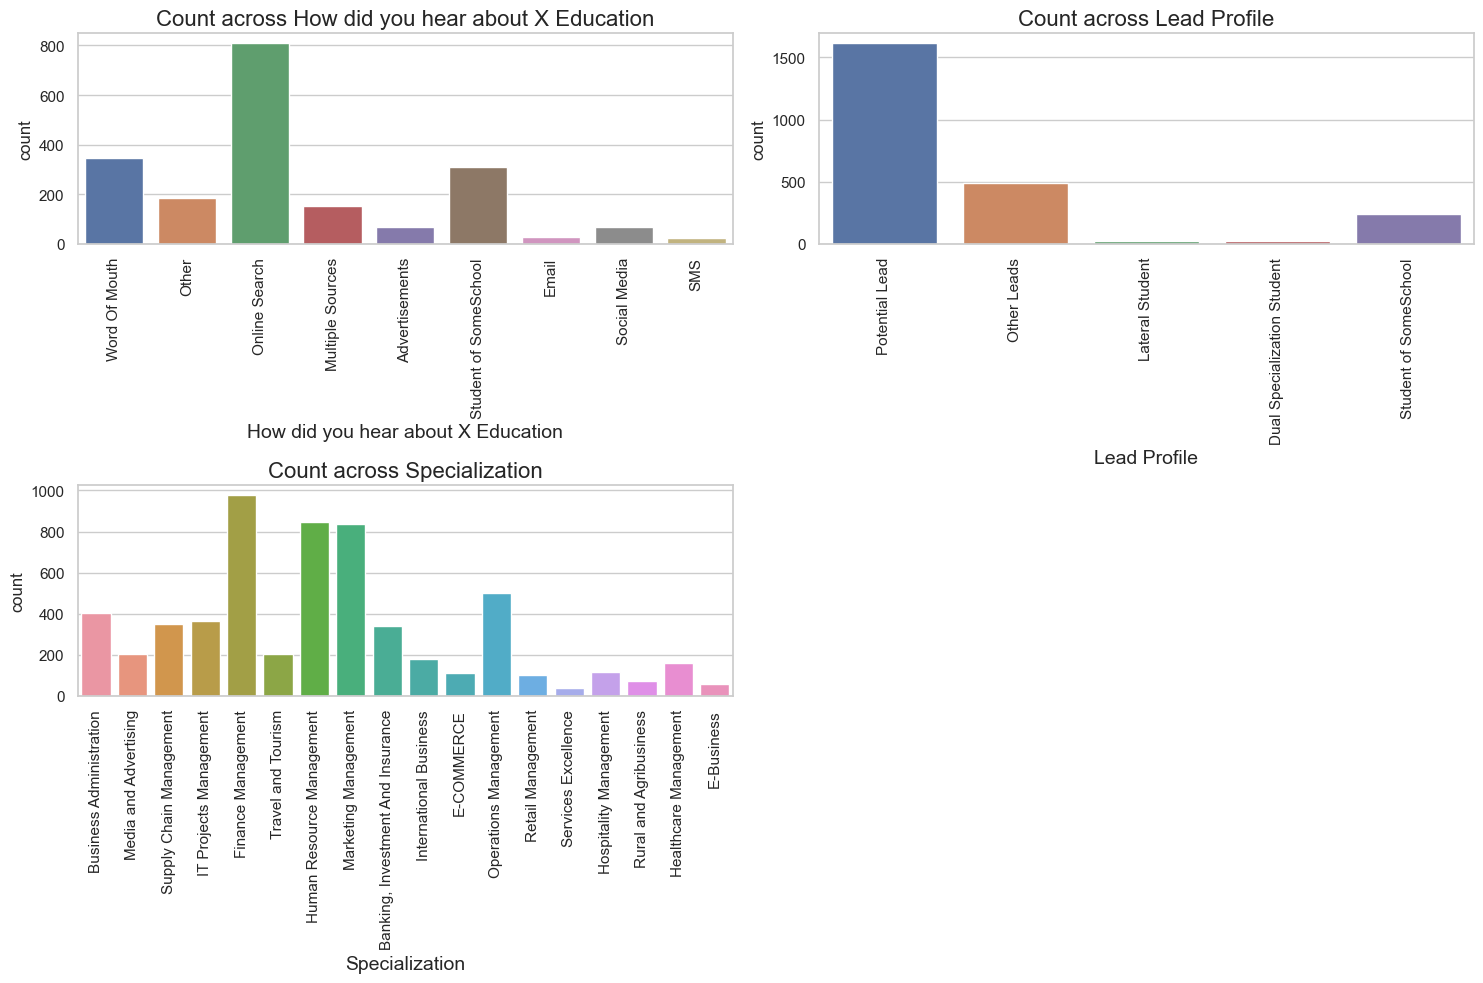

In [131]:

# Assuming 'leads' is your DataFrame containing the data
# Replace 'Select' values with NaN
leads.replace('Select', np.nan, inplace=True)

def countplot(x, fig):
    plt.subplot(2, 2, fig)
    sns.countplot(data=leads, x=x)  # Use data parameter to specify the DataFrame
    plt.title('Count across' + ' ' + x, size=16)
    plt.xlabel(x, size=14)
    plt.xticks(rotation=90)

plt.figure(figsize=(15, 10))

countplot('How did you hear about X Education', 1)
countplot('Lead Profile', 2)
countplot('Specialization', 3)

plt.tight_layout()
plt.show()  # Don't forget to add this to display the plots


there are a few columns in which there is a level called `'Select'` which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [132]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.

In [133]:
leads['Lead Profile'].astype('category').value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [134]:
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [135]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

### Visualizing the features

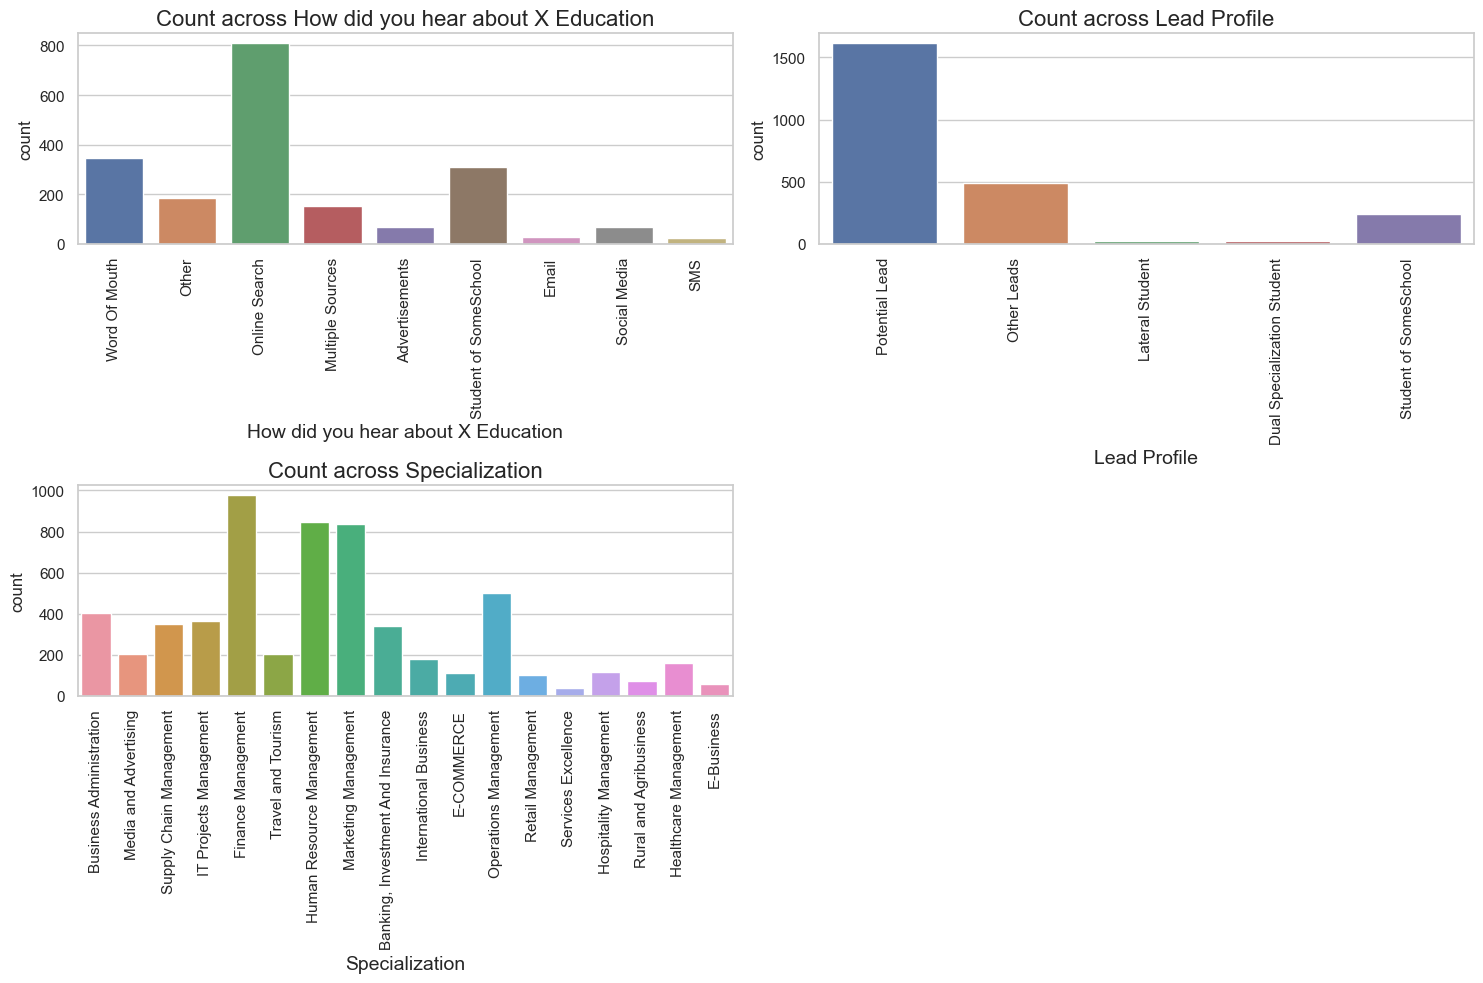

In [136]:
# Assuming 'leads' is your DataFrame containing the data
# Replace 'Select' values with NaN
leads.replace('Select', np.nan, inplace=True)

def countplot(x, fig):
    plt.subplot(2, 2, fig)
    sns.countplot(data=leads, x=x)  # Use data parameter to specify the DataFrame
    plt.title('Count across' + ' ' + x, size=16)
    plt.xlabel(x, size=14)
    plt.xticks(rotation=90)

plt.figure(figsize=(15, 10))

countplot('How did you hear about X Education', 1)
countplot('Lead Profile', 2)
countplot('Specialization', 3)

plt.tight_layout()
plt.show()  # Don't forget to add this to display the plots


As it can be seen that the levels of `"Lead Profile"` and `"How did you hear about X Education"` have a lot of rows which have the value Select which is of no use to the analysis

So it's best that we drop them.

In [138]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also we notice that, when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

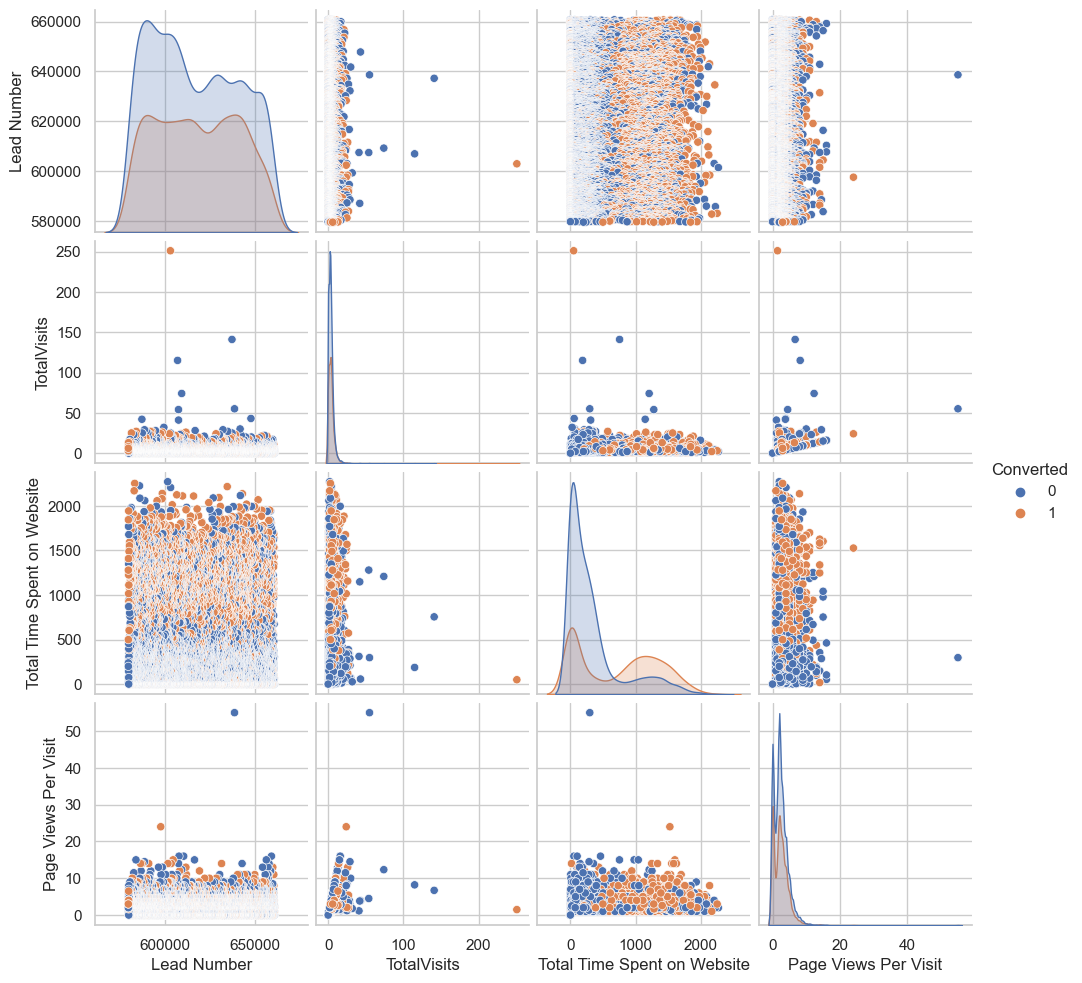

In [137]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

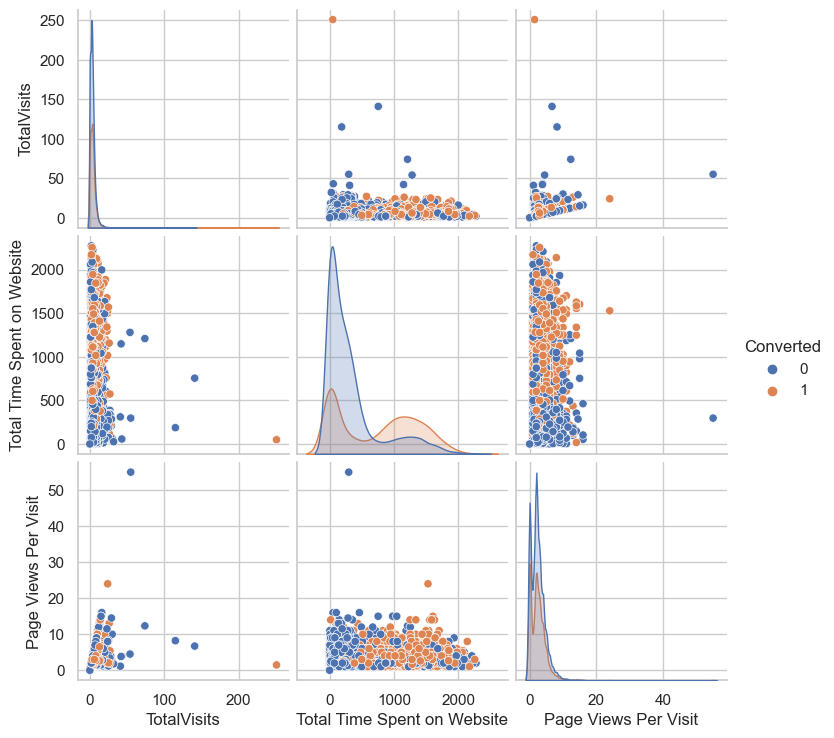

In [139]:
x_edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [140]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


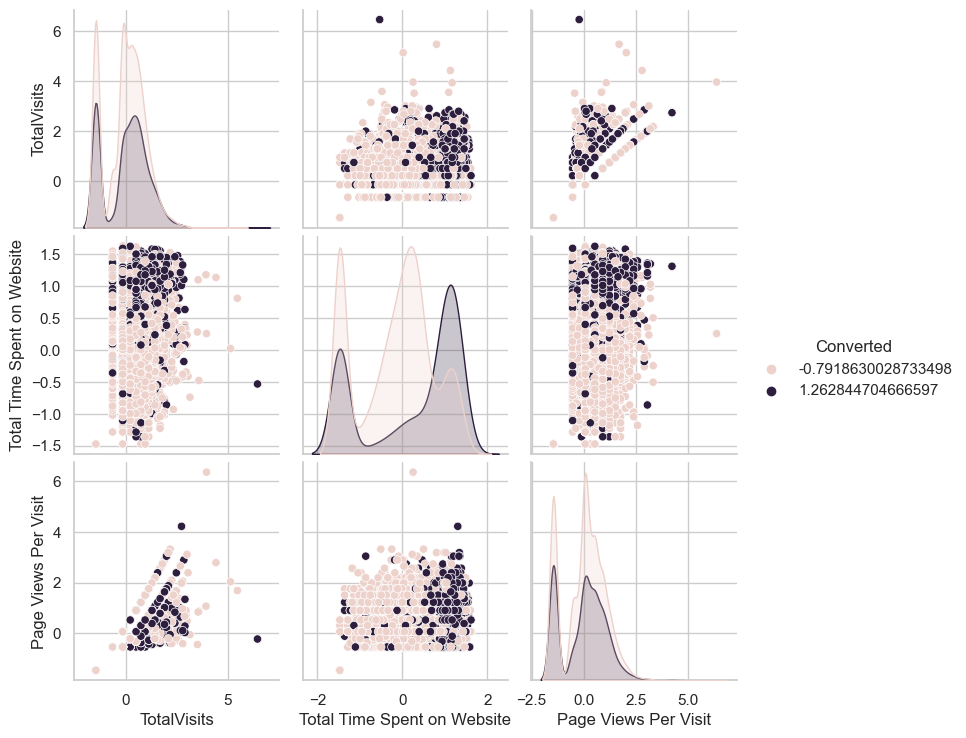

In [147]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

In [146]:
# Dropping the above columns

In [148]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [149]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The variable `What matters most to you in choosing a course` has the `level Better Career Prospects` 6528 times while the other two levels appear once twice and once respectively. 

So we should dropping this column as well.

In [150]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [151]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Specialization                            3380
What is your current occupation           2690
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [152]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

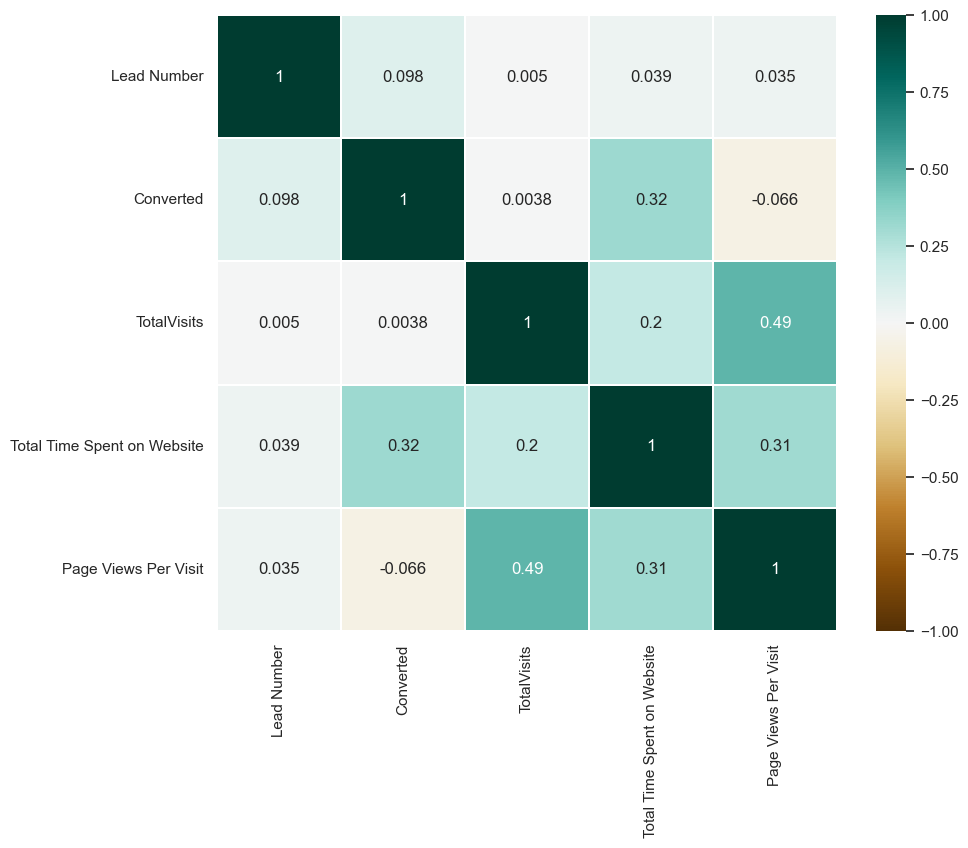

In [153]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

### Analysing Categorical features

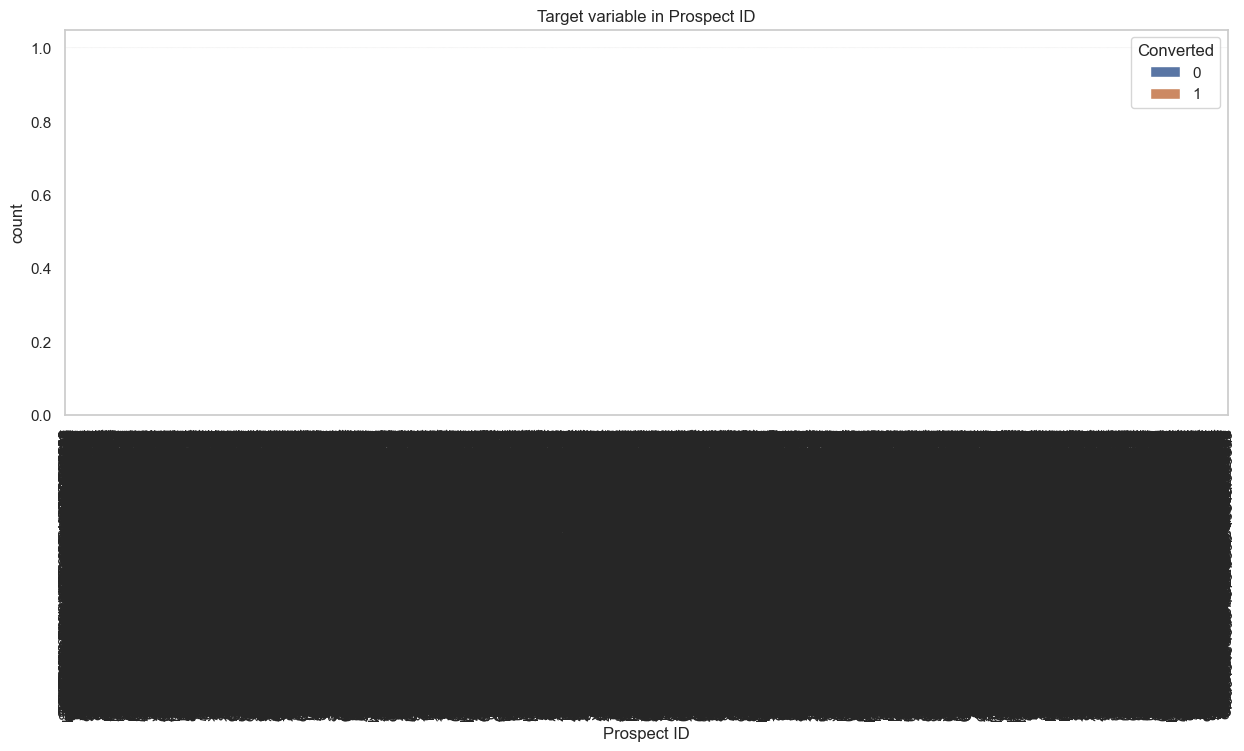

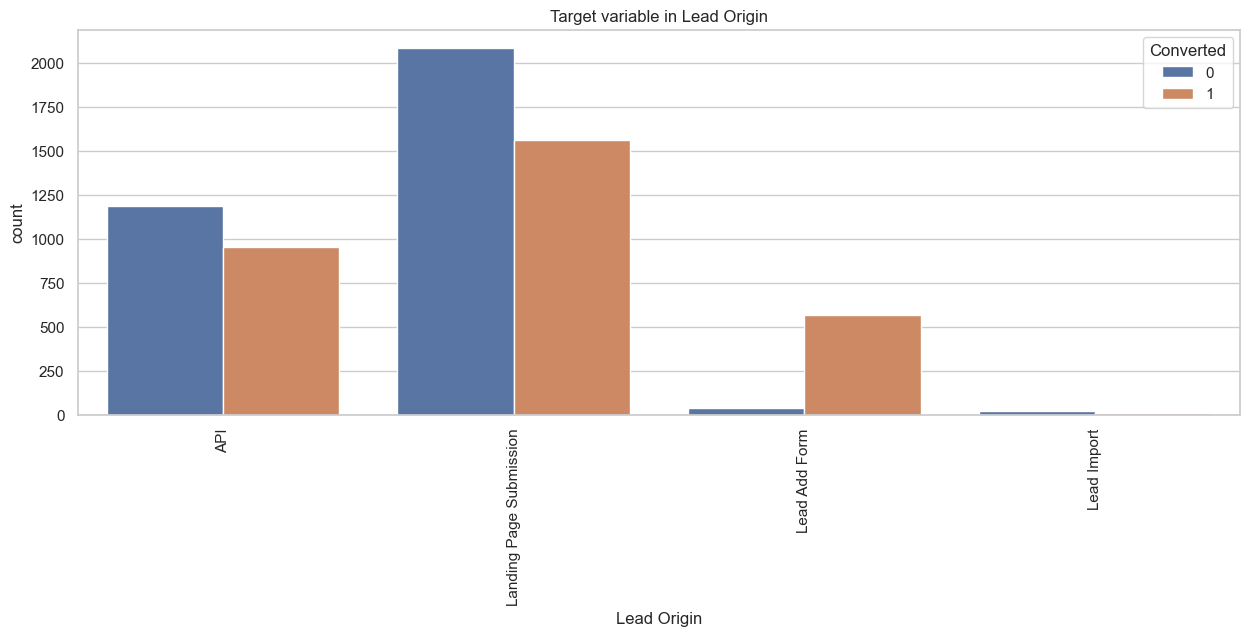

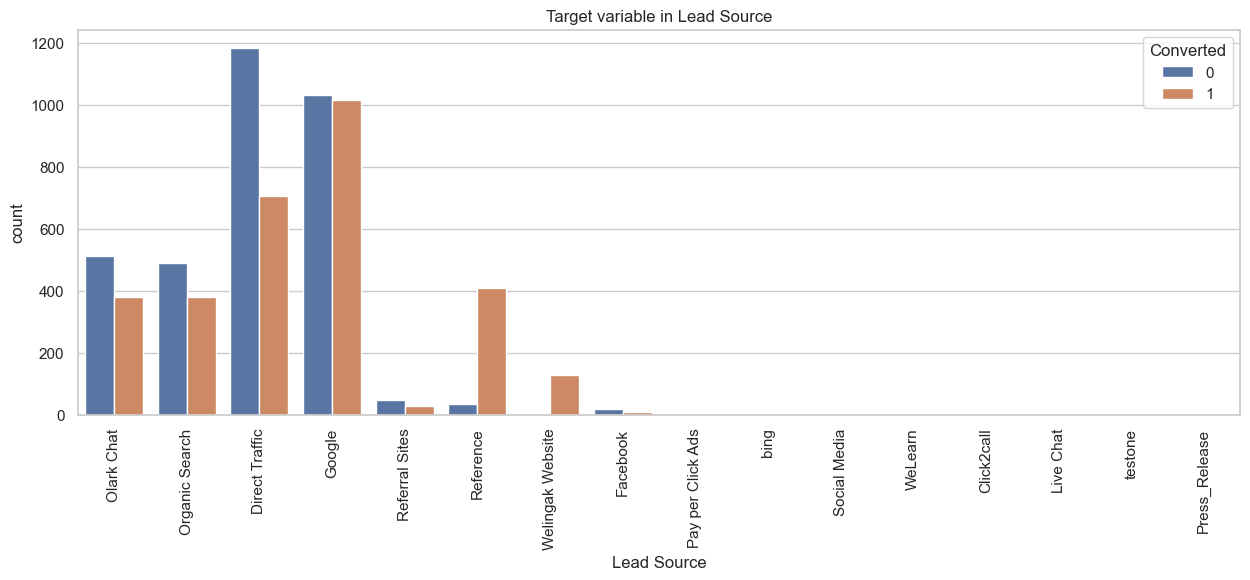

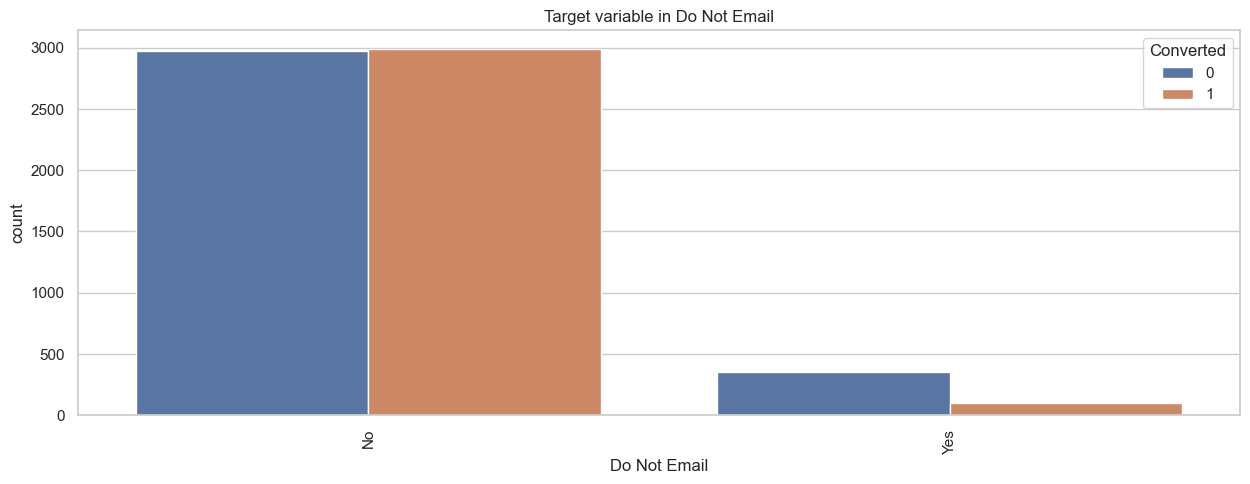

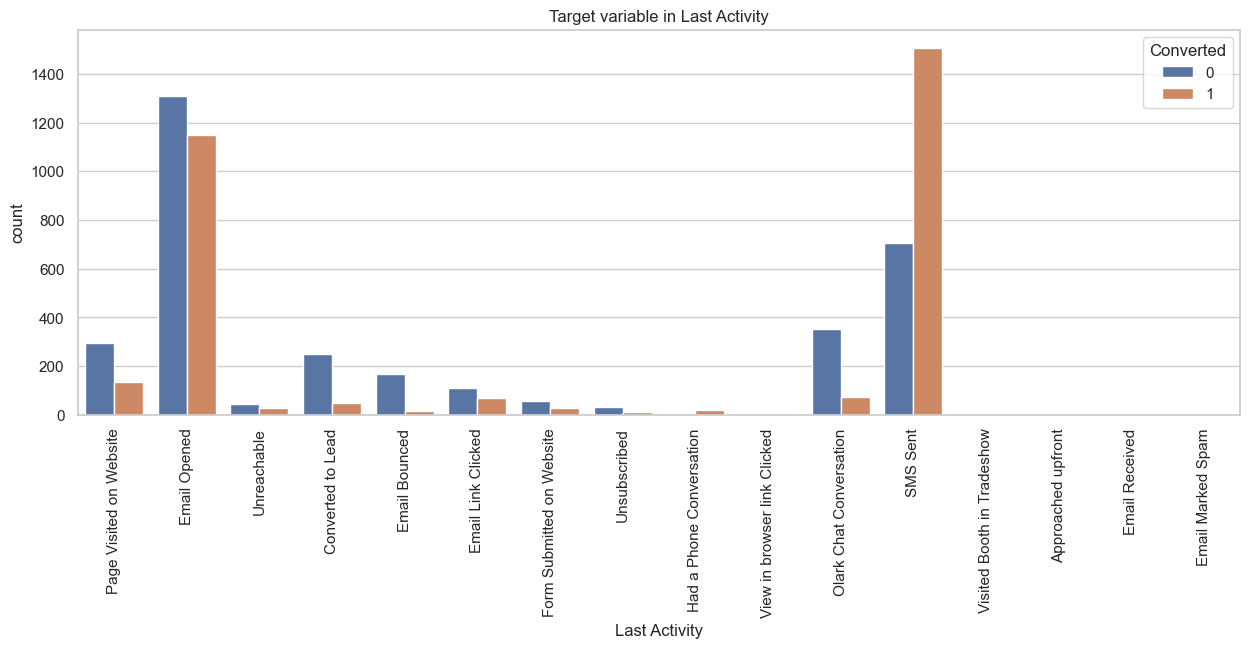

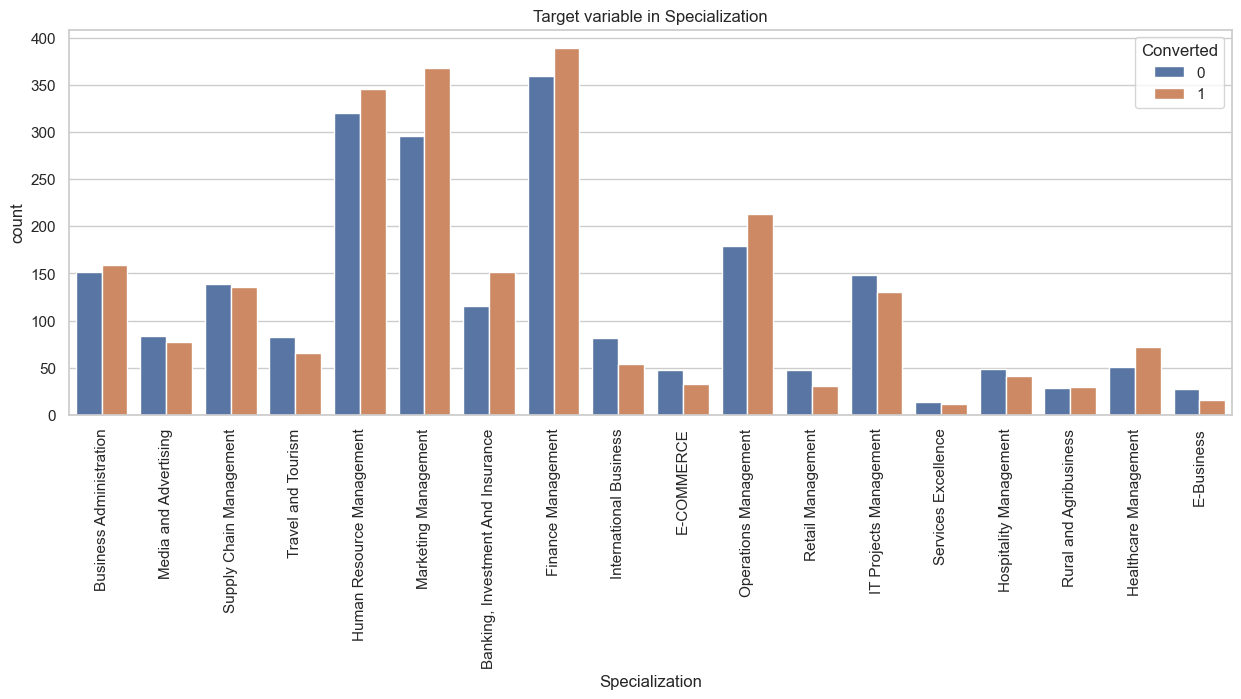

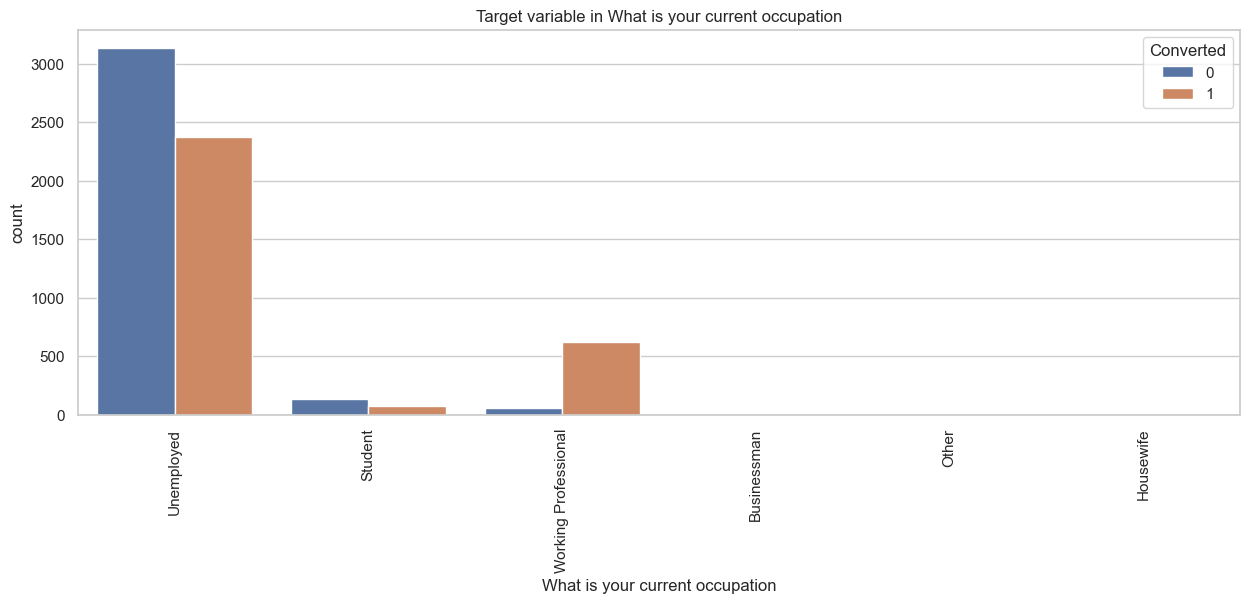

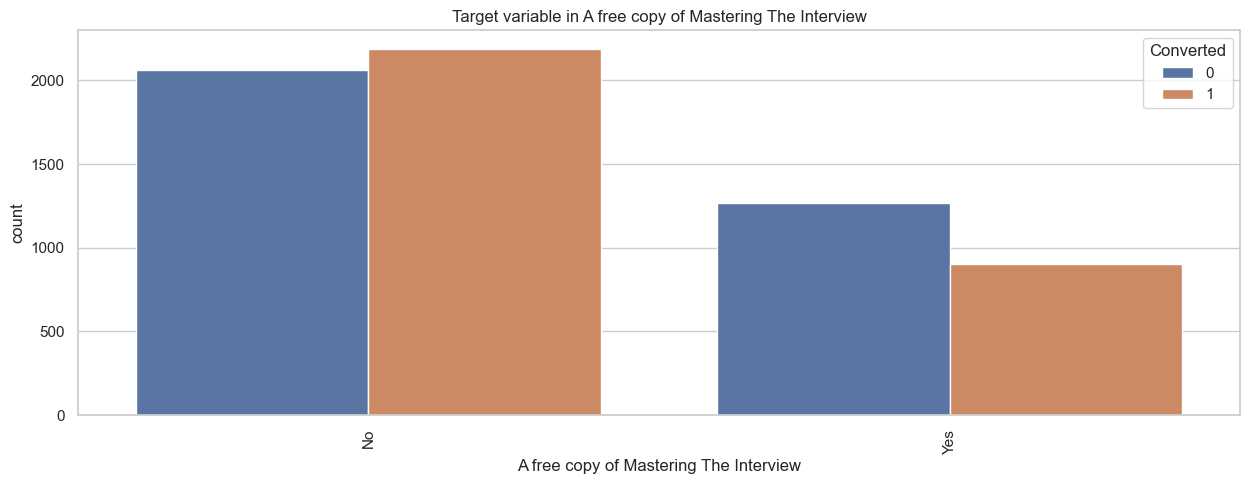

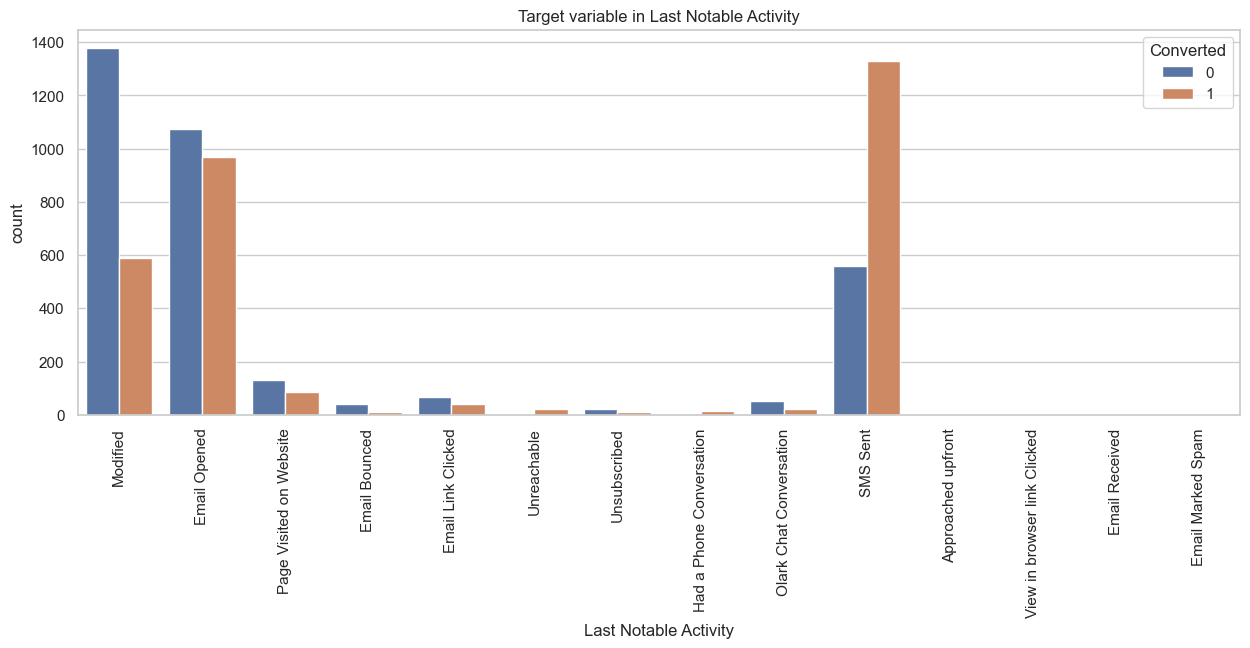

In [159]:
conv = leads.select_dtypes(include="object").columns

for i in conv:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=leads, x=i, hue='Converted')
    plt.xticks(rotation=90)
    plt.title('Target variable in' + ' ' + i)
    plt.xlabel(i)
    plt.legend(title='Converted', loc='upper right')
    plt.show()

In [155]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Specialization                            1947
TotalVisits                                130
Page Views Per Visit                       130
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [156]:
# Dropping the null values rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [160]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Specialization                            1878
Lead Source                                 29
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [161]:
# Dropping the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [162]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Specialization                            1856
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [163]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [164]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [165]:
print(len(leads.index))
print(len(leads.index)/9240)

4535
0.4908008658008658


We still have around 69% of the rows which seems good enough.

In [166]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [167]:
# Dropping the "Prospect ID" and "Lead Number" 
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [168]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


### Dummy variable creation

The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [169]:
# Checking the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [170]:
# Demo Cell
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [171]:
pd.get_dummies(df)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [172]:
pd.get_dummies(df, prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [173]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [177]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [178]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,1,8.0,1351,8.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
11,1,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### Test-Train Split

The next step is to spliting the dataset into training an testing sets.

In [ ]:
# Importing the `train_test_split` library

In [179]:
# Put all the feature variables in X

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,8.0,1351,8.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
11,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [180]:
y = leads['Converted']

y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [181]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [182]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (3174, 55)
y_train Size (3174,)


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [183]:
# Importing the 'MinMax scaler' Library

In [184]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2006,0.055777,0.119159,0.127273,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5140,0.019920,0.005607,0.030364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7588,0.015936,0.014019,0.072727,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5244,0.023904,0.073832,0.054545,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8663,0.043825,0.088785,0.066727,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

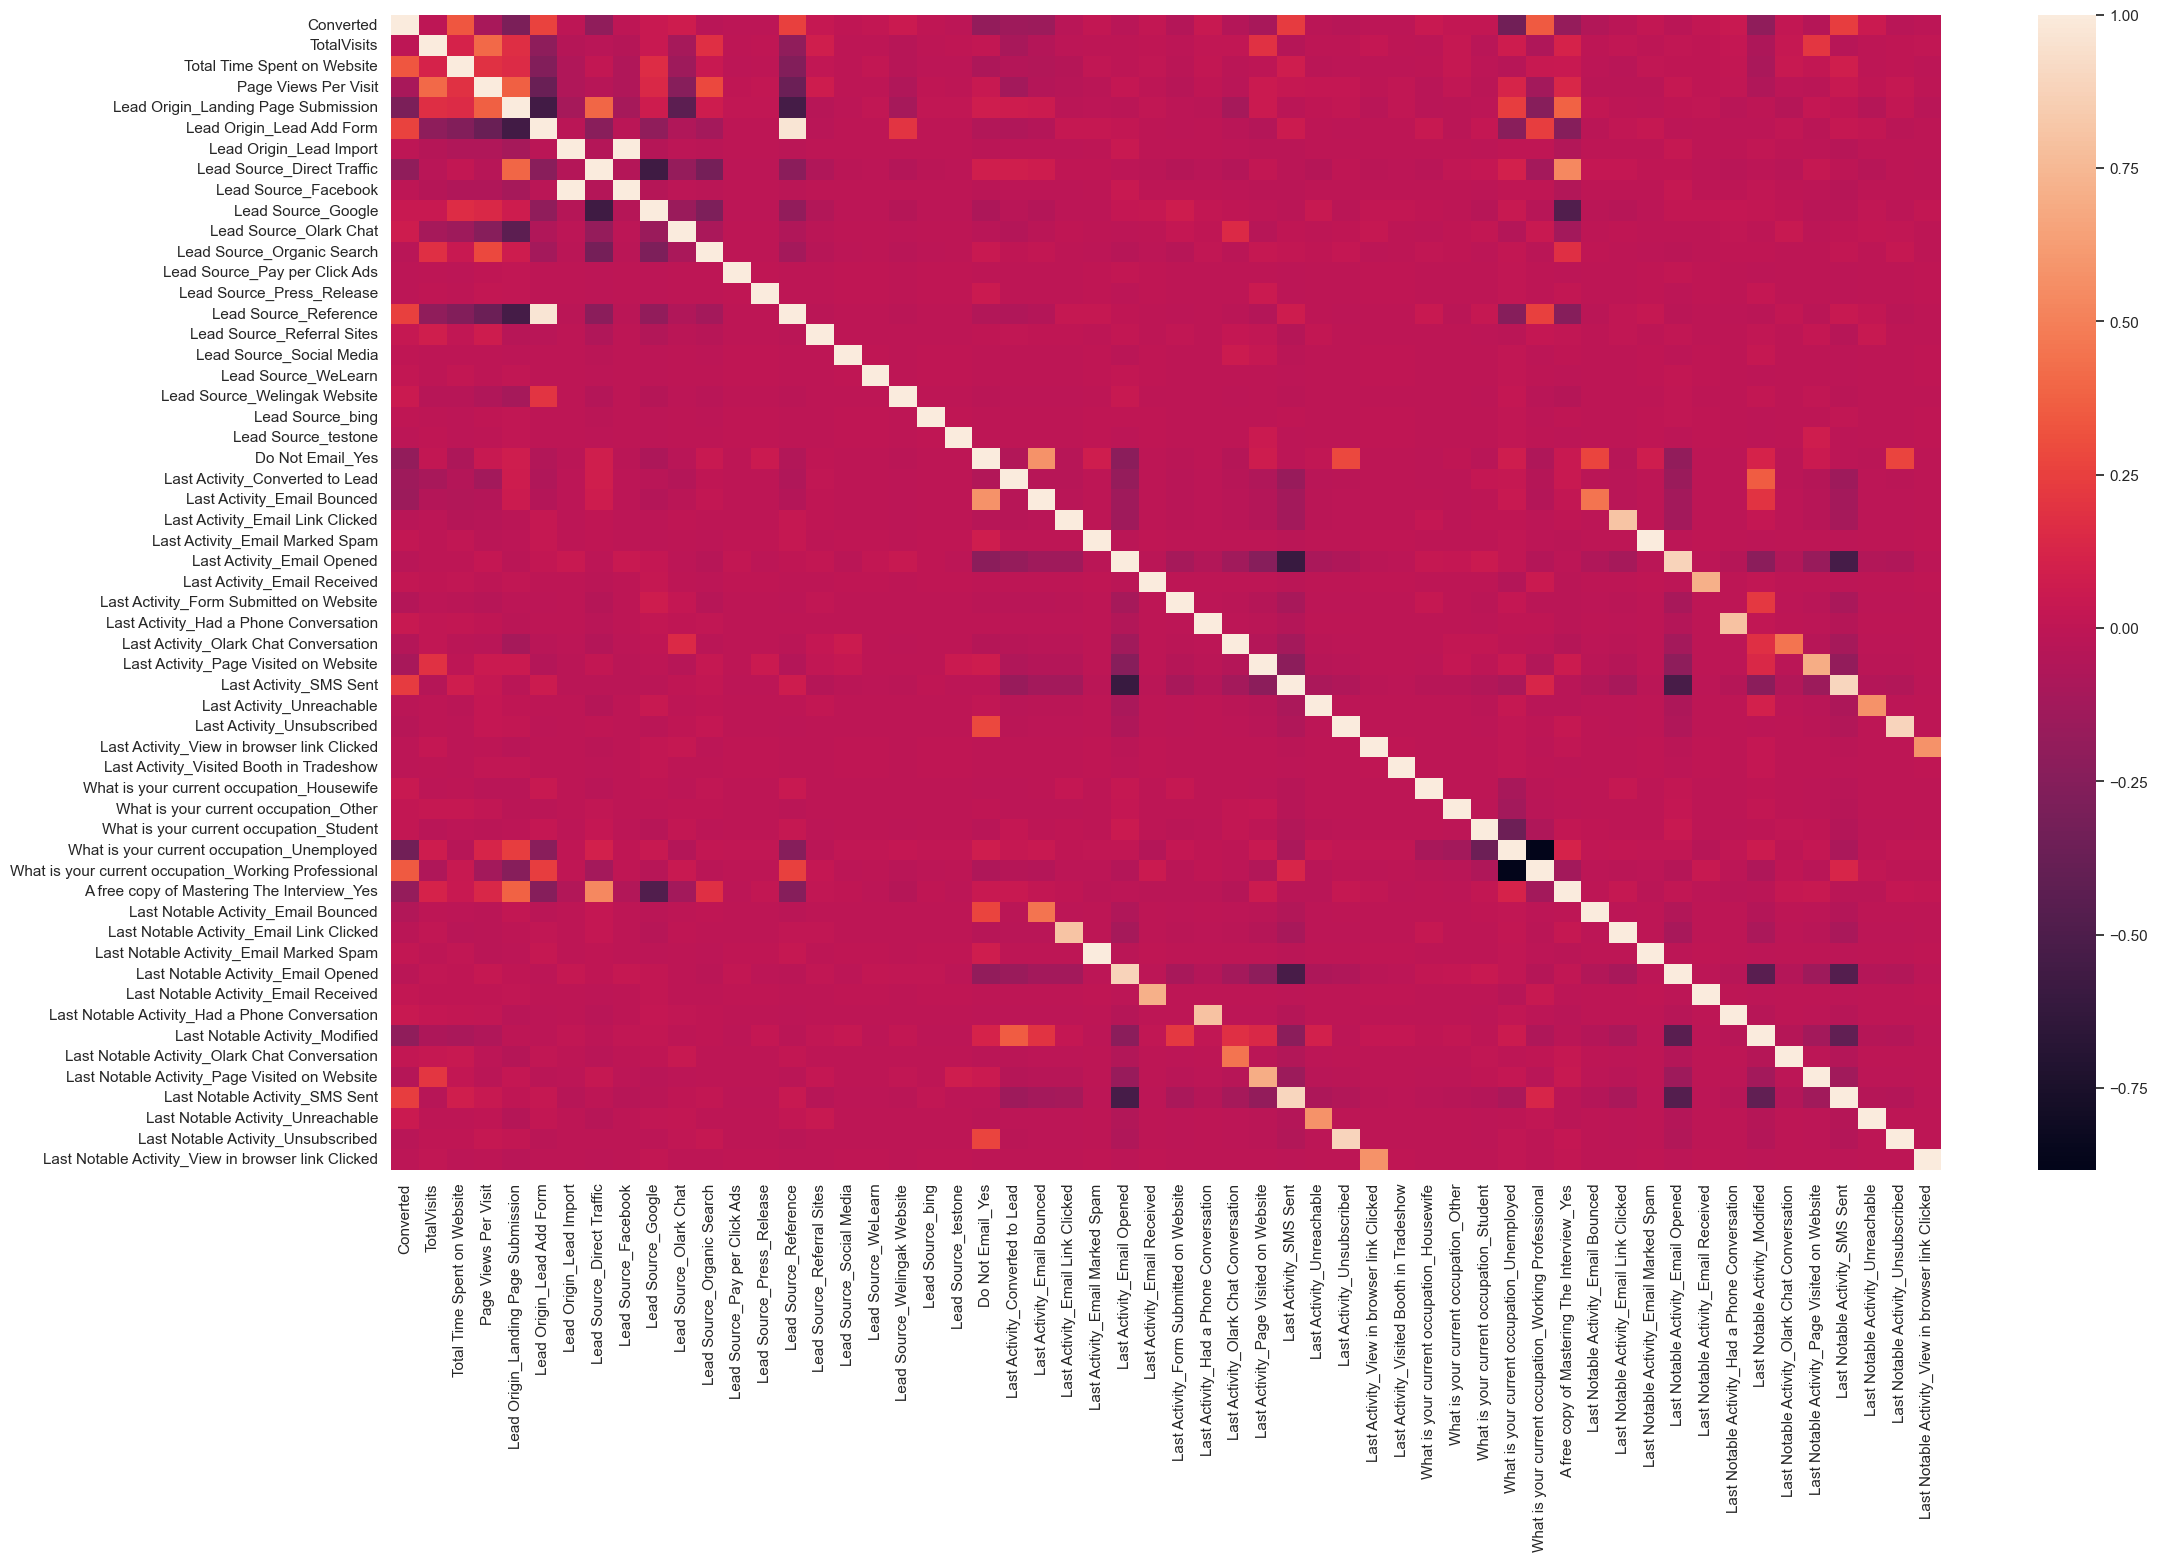

In [185]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [186]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [192]:
# Importing the 'RFE' and select 20 variables

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [193]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 20),
 ('Lead Source_Press_Release', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 29),
 ('Lead Source_testone', False, 18),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Mark

In [194]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [195]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [196]:
# Importing 'statsmodels'

### Model 1

In [197]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3153
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.0
Date:                Tue, 29 Aug 2023   Deviance:                       2830.0
Time:                        20:20:55   Pearson chi2:                 3.87e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1353      0.279      0.485      0.628      -0.412       0.682
TotalVisits                                              8.7407      2.846      3.071      0.002       3.162      14.319
Total Time Spent on Website                              3.9704      0.195     20.368      0.000       3.588       4.352
Lead Origin_Landing Page Submission                     -1.2752      0.156     -8.150      0.000      -1.582      -0.969
Lead Origin_Lead Add Form                               -0.0409      1.234     -0.033      0.974      -2.460       2.378
Lead Source_Direct Traffic                              -0.3303      0.109     -3.039      0.002      -0.543      -0.117
Lead Source_Organic Search                              -0.3321      0.146     -2.280      0.023      -0.618      -0.047
Lead Source_Reference                                    2.7626      1.270      2.176      0.030       0.274       5.251
Lead Source_Welingak Website                            23.6820   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
Do Not Email_Yes                                        -1.4433      0.256     -5.631      0.000      -1.946      -0.941
Last Activity_Converted to Lead                         -1.2942      0.288     -4.491      0.000      -1.859      -0.729
Last Activity_Email Bounced                             -2.4557      1.069     -2.297      0.022      -4.551      -0.360
Last Activity_Had a Phone Conversation                   0.6562      1.276      0.514      0.607      -1.846       3.158
Last Activity_Olark Chat Conversation                   -0.9654      0.307     -3.142      0.002      -1.568      -0.363
Last Activity_SMS Sent                                   0.9928      0.101      9.789      0.000       0.794       1.192
What is your current occupation_Housewife               23.1580   2.73e+04      0.001      0.999   -5.35e+04    5.35e+04
What is your current occupation_Unemployed              -0.7875      0.248     -3.175      0.001      -1.274      -0.301
What is your current occupation_Working Professional     1.9432      0.320      6.072      0.000       1.316       2.570
Last Notable Activity_Email Bounced                      3.0234      1.225      2.469      0.014       0.623       5.424
Last Notable Activity_Had a Phone Conversation          22.7172   2.32e+04      0.001      0.999   -4.55e+04    4.55e+04
Last Notable Activity_Unreachable                        2.8477      1.124      2.534      0.011       0.646       5.050
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

### Checking `VIF`

In [198]:
# Importing the 'variance_inflation_factor' library

In [199]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,77.64
6,Lead Source_Reference,74.18
2,Lead Origin_Landing Page Submission,7.38
15,What is your current occupation_Unemployed,7.23
7,Lead Source_Welingak Website,4.00
1,Total Time Spent on Website,2.38
4,Lead Source_Direct Traffic,2.32
18,Last Notable Activity_Had a Phone Conversation,2.18
11,Last Activity_Had a Phone Conversation,2.18
16,What is your current occupation_Working Professional,2.10


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [200]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

### Model 2

In [201]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3154
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.4
Date:                Tue, 29 Aug 2023   Deviance:                       2834.8
Time:                        20:21:17   Pearson chi2:                 3.78e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3890
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1396      0.279      0.501      0.616      -0.407       0.686
TotalVisits                                              8.7494      2.847      3.073      0.002       3.169      14.330
Total Time Spent on Website                              3.9719      0.195     20.372      0.000       3.590       4.354
Lead Origin_Landing Page Submission                     -1.2753      0.156     -8.149      0.000      -1.582      -0.969
Lead Origin_Lead Add Form                                2.5556      0.339      7.543      0.000       1.892       3.220
Lead Source_Direct Traffic                              -0.3305      0.109     -3.040      0.002      -0.544      -0.117
Lead Source_Organic Search                              -0.3325      0.146     -2.282      0.022      -0.618      -0.047
Lead Source_Welingak Website                            21.0871   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
Do Not Email_Yes                                        -1.4396      0.256     -5.628      0.000      -1.941      -0.938
Last Activity_Converted to Lead                         -1.2929      0.288     -4.486      0.000      -1.858      -0.728
Last Activity_Email Bounced                             -2.4578      1.069     -2.299      0.022      -4.554      -0.362
Last Activity_Had a Phone Conversation                   0.6741      1.269      0.531      0.595      -1.813       3.161
Last Activity_Olark Chat Conversation                   -0.9610      0.307     -3.131      0.002      -1.563      -0.359
Last Activity_SMS Sent                                   0.9970      0.101      9.839      0.000       0.798       1.196
What is your current occupation_Housewife               23.1587   2.73e+04      0.001      0.999   -5.36e+04    5.36e+04
What is your current occupation_Unemployed              -0.7945      0.247     -3.210      0.001      -1.280      -0.309
What is your current occupation_Working Professional     1.9406      0.320      6.072      0.000       1.314       2.567
Last Notable Activity_Email Bounced                      3.0233      1.225      2.468      0.014       0.623       5.424
Last Notable Activity_Had a Phone Conversation          22.7011   2.32e+04      0.001      0.999   -4.55e+04    4.55e+04
Last Notable Activity_Unreachable                        2.8535      1.123      2.541      0.011       0.653       5.054
========================================================================================================================
"""

#### Checking VIF

In [202]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.38
14,What is your current occupation_Unemployed,7.22
1,Total Time Spent on Website,2.38
4,Lead Source_Direct Traffic,2.32
10,Last Activity_Had a Phone Conversation,2.18
17,Last Notable Activity_Had a Phone Conversation,2.18
15,What is your current occupation_Working Professional,2.10
9,Last Activity_Email Bounced,1.88
7,Do Not Email_Yes,1.69
12,Last Activity_SMS Sent,1.69


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [203]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [204]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3155
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1419.0
Date:                Tue, 29 Aug 2023   Deviance:                       2838.0
Time:                        20:21:35   Pearson chi2:                 3.77e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1430      0.279      0.513      0.608      -0.403       0.689
TotalVisits                                              8.9356      2.858      3.127      0.002       3.335      14.536
Total Time Spent on Website                              3.9688      0.195     20.362      0.000       3.587       4.351
Lead Origin_Landing Page Submission                     -1.2801      0.156     -8.198      0.000      -1.586      -0.974
Lead Origin_Lead Add Form                                2.5473      0.339      7.519      0.000       1.883       3.211
Lead Source_Direct Traffic                              -0.3310      0.109     -3.048      0.002      -0.544      -0.118
Lead Source_Organic Search                              -0.3437      0.146     -2.360      0.018      -0.629      -0.058
Lead Source_Welingak Website                            21.0912   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
Do Not Email_Yes                                        -1.4533      0.255     -5.689      0.000      -1.954      -0.953
Last Activity_Converted to Lead                         -1.2903      0.288     -4.478      0.000      -1.855      -0.726
Last Activity_Email Bounced                             -2.4473      1.070     -2.288      0.022      -4.544      -0.351
Last Activity_Had a Phone Conversation                   2.1420      0.935      2.291      0.022       0.309       3.975
Last Activity_Olark Chat Conversation                   -0.9636      0.307     -3.139      0.002      -1.565      -0.362
Last Activity_SMS Sent                                   0.9982      0.101      9.850      0.000       0.800       1.197
What is your current occupation_Housewife               23.1652   2.73e+04      0.001      0.999   -5.35e+04    5.36e+04
What is your current occupation_Unemployed              -0.7941      0.247     -3.209      0.001      -1.279      -0.309
What is your current occupation_Working Professional     1.9382      0.320      6.064      0.000       1.312       2.565
Last Notable Activity_Email Bounced                      3.0262      1.225      2.469      0.014       0.624       5.428
Last Notable Activity_Unreachable                        2.8536      1.123      2.541      0.011       0.653       5.055
========================================================================================================================
"""

Dropping the `What is your current occupation_Housewife` as having high P value

In [205]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 4

In [206]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3156
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.9
Date:                Tue, 29 Aug 2023   Deviance:                       2843.8
Time:                        20:21:46   Pearson chi2:                 3.78e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2502      0.274      0.913      0.361      -0.287       0.787
TotalVisits                                              8.7554      2.841      3.082      0.002       3.188      14.323
Total Time Spent on Website                              3.9657      0.195     20.369      0.000       3.584       4.347
Lead Origin_Landing Page Submission                     -1.2741      0.156     -8.169      0.000      -1.580      -0.968
Lead Origin_Lead Add Form                                2.5472      0.339      7.521      0.000       1.883       3.211
Lead Source_Direct Traffic                              -0.3343      0.108     -3.082      0.002      -0.547      -0.122
Lead Source_Organic Search                              -0.3324      0.145     -2.288      0.022      -0.617      -0.048
Lead Source_Welingak Website                            20.0916   1.53e+04      0.001      0.999      -3e+04       3e+04
Do Not Email_Yes                                        -1.4546      0.255     -5.697      0.000      -1.955      -0.954
Last Activity_Converted to Lead                         -1.2991      0.288     -4.510      0.000      -1.864      -0.735
Last Activity_Email Bounced                             -2.4704      1.072     -2.304      0.021      -4.571      -0.369
Last Activity_Had a Phone Conversation                   2.1383      0.935      2.288      0.022       0.306       3.970
Last Activity_Olark Chat Conversation                   -0.9708      0.307     -3.161      0.002      -1.573      -0.369
Last Activity_SMS Sent                                   0.9942      0.101      9.813      0.000       0.796       1.193
What is your current occupation_Unemployed              -0.9006      0.243     -3.714      0.000      -1.376      -0.425
What is your current occupation_Working Professional     1.8318      0.316      5.802      0.000       1.213       2.451
Last Notable Activity_Email Bounced                      3.0437      1.228      2.479      0.013       0.638       5.450
Last Notable Activity_Unreachable                        2.8507      1.123      2.539      0.011       0.650       5.052
========================================================================================================================
"""

Droppint hre  `What is your current occupation_Working Professional` as having high P value

In [207]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

### Model 4

In [208]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3157
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1439.3
Date:                Tue, 29 Aug 2023   Deviance:                       2878.6
Time:                        20:22:00   Pearson chi2:                 3.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3805
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.4344      0.195      7.360      0.000       1.052       1.816
TotalVisits                                    8.5522      2.820      3.033      0.002       3.026      14.079
Total Time Spent on Website                    3.9866      0.194     20.530      0.000       3.606       4.367
Lead Origin_Landing Page Submission           -1.2970      0.155     -8.371      0.000      -1.601      -0.993
Lead Origin_Lead Add Form                      2.5311      0.338      7.499      0.000       1.870       3.193
Lead Source_Direct Traffic                    -0.3644      0.108     -3.376      0.001      -0.576      -0.153
Lead Source_Organic Search                    -0.3383      0.144     -2.344      0.019      -0.621      -0.055
Lead Source_Welingak Website                  20.0822   1.53e+04      0.001      0.999   -2.99e+04       3e+04
Do Not Email_Yes                              -1.4497      0.252     -5.745      0.000      -1.944      -0.955
Last Activity_Converted to Lead               -1.2376      0.278     -4.447      0.000      -1.783      -0.692
Last Activity_Email Bounced                   -2.6982      1.137     -2.372      0.018      -4.928      -0.469
Last Activity_Had a Phone Conversation         2.1662      0.930      2.330      0.020       0.344       3.989
Last Activity_Olark Chat Conversation         -0.9855      0.306     -3.223      0.001      -1.585      -0.386
Last Activity_SMS Sent                         1.0378      0.101     10.325      0.000       0.841       1.235
What is your current occupation_Unemployed    -2.0711      0.152    -13.585      0.000      -2.370      -1.772
Last Notable Activity_Email Bounced            3.2571      1.290      2.525      0.012       0.729       5.785
Last Notable Activity_Unreachable              2.8813      1.123      2.565      0.010       0.680       5.083
==============================================================================================================
"""

#### Checking final VIF

In [209]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,6.14
13,What is your current occupation_Unemployed,4.29
4,Lead Source_Direct Traffic,2.32
1,Total Time Spent on Website,2.16
9,Last Activity_Email Bounced,1.87
7,Do Not Email_Yes,1.69
0,TotalVisits,1.62
12,Last Activity_SMS Sent,1.57
5,Lead Source_Organic Search,1.41
14,Last Notable Activity_Email Bounced,1.27


## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [210]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

2006    0.090671
5140    0.061428
7588    0.255762
5244    0.318318
8663    0.065701
734     0.058688
4481    0.869254
971     0.493447
5106    0.203421
869     0.399563
dtype: float64

In [211]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09067117, 0.06142764, 0.25576233, 0.3183178 , 0.06570096,
       0.0586879 , 0.86925401, 0.49344697, 0.20342086, 0.39956265])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [212]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.090671
1,0,0.061428
2,1,0.255762
3,0,0.318318
4,0,0.065701


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [213]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.090671,0
1,0,0.061428,0
2,1,0.255762,0
3,0,0.318318,0
4,0,0.065701,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [214]:
# Importing the 'metrics' library from sklearn for evaluation

### Creating the `Confusion matrix`


In [215]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1255  298]
 [ 353 1268]]


In [216]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7948960302457467


In [217]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [218]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7822331893892659

In [219]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8081133290405667

### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [220]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [221]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

In [222]:
# Importing the 'matplotlib'  to plot the ROC curve`

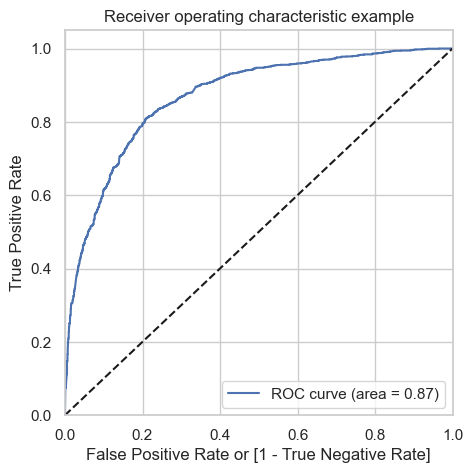

In [223]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [224]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.090671,0,1,0,0,0,0,0,0,0,0,0
1,0,0.061428,0,1,0,0,0,0,0,0,0,0,0
2,1,0.255762,0,1,1,1,0,0,0,0,0,0,0
3,0,0.318318,0,1,1,1,1,0,0,0,0,0,0
4,0,0.065701,0,1,0,0,0,0,0,0,0,0,0


In [225]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.510712  1.000000  0.000000
0.1   0.1  0.580655  0.993831  0.149388
0.2   0.2  0.714556  0.951265  0.467482
0.3   0.3  0.766541  0.909932  0.616871
0.4   0.4  0.790800  0.847008  0.732131
0.5   0.5  0.794896  0.782233  0.808113
0.6   0.6  0.771897  0.686613  0.860914
0.7   0.7  0.751103  0.606416  0.902125
0.8   0.8  0.710775  0.487353  0.943979
0.9   0.9  0.635791  0.302283  0.983902


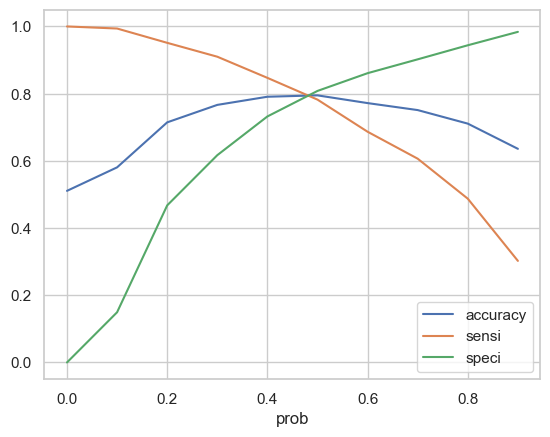

In [226]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around `0.42`, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [227]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.090671,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061428,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.255762,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.318318,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.065701,0,1,0,0,0,0,0,0,0,0,0,0


In [228]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7958412098298677

In [229]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1168,  385],
       [ 263, 1358]], dtype=int64)

In [230]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [231]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.83775447254781

In [232]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7520927237604637

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set
Let's now make predicitons on the test set

In [233]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [234]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8536,0.007968,0.015421,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
945,0.011952,0.193925,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1550,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8570,0.015936,0.109346,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1410,0.019920,0.137383,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [235]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [236]:
# Checking X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8536,1.0,0.007968,0.015421,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
945,1.0,0.011952,0.193925,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1550,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8570,1.0,0.015936,0.109346,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1410,1.0,0.019920,0.137383,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,1.0,0.007968,0.181776,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8201,1.0,0.007968,0.591589,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7328,1.0,0.011952,0.084579,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
283,1.0,0.015936,0.137383,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [237]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [238]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [239]:
y_test_pred[:10]

8536    0.244038
945     0.269143
1550    0.869254
8570    0.973168
1410    0.174512
5664    0.903805
5232    0.037055
6744    0.246133
6924    0.261951
3878    0.207906
dtype: float64

In [240]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [241]:
# Let's see the head

y_pred_1.head()

,0
8536,0.244038
945,0.269143
1550,0.869254
8570,0.973168
1410,0.174512


In [242]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [243]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [244]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [245]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.244038
1,0,0.269143
2,1,0.869254
3,1,0.973168
4,0,0.174512


In [246]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [247]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.244038
1,0,0.269143
2,1,0.869254
3,1,0.973168
4,0,0.174512


In [248]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [249]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.244038,0
1,0,0.269143,0
2,1,0.869254,1
3,1,0.973168,1
4,0,0.174512,0


In [250]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7788390889052168

In [251]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[489, 177],
       [124, 571]], dtype=int64)

In [252]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [253]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.8215827338129497

In [254]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7342342342342343

### Precision-Recall View
Let's now also build the training model using the precision-recall view

In [255]:
#Looking at the confusion matrix again

In [256]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1255,  298],
       [ 353, 1268]], dtype=int64)

#### Precision = 
         TP / TP + FP

In [257]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.80970625798212

#### Recall = 
          TP / TP + FN

In [258]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7822331893892659

### Precision and recall tradeoff

Importing the `Precision recall curve` library

In [259]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 3169    1
 3170    0
 3171    1
 3172    1
 3173    1
 Name: Converted, Length: 3174, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3169    0
 3170    1
 3171    1
 3172    0
 3173    1
 Name: Predicted, Length: 3174, dtype: int64)

In [260]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

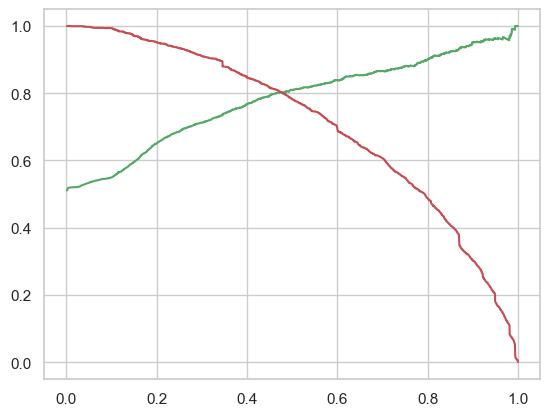

In [261]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [262]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.090671,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061428,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.255762,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.318318,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.065701,0,1,0,0,0,0,0,0,0,0,0,0


In [263]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7977315689981096

In [264]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1194,  359],
       [ 283, 1338]], dtype=int64)

In [265]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision

In [266]:
TP/(TP+FP)

0.788450206246317

### Recall

In [267]:
TP/(TP+FN)

0.8254164096236891

This cutoff point seems good to go!

## Step 5: Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [268]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [269]:
y_test_pred[:10]

8536    0.244038
945     0.269143
1550    0.869254
8570    0.973168
1410    0.174512
5664    0.903805
5232    0.037055
6744    0.246133
6924    0.261951
3878    0.207906
dtype: float64

In [270]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [271]:
# Let's see the head

y_pred_1.head()

,0
8536,0.244038
945,0.269143
1550,0.869254
8570,0.973168
1410,0.174512


In [272]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [273]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [274]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [275]:
# Checking the 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.244038
1,0,0.269143
2,1,0.869254
3,1,0.973168
4,0,0.174512


In [276]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [277]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.244038
1,0,0.269143
2,1,0.869254
3,1,0.973168
4,0,0.174512


In [278]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [279]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.244038,0
1,0,0.269143,0
2,1,0.869254,1
3,1,0.973168,1
4,0,0.174512,0


In [280]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7795738427626745

In [281]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[496, 170],
       [130, 565]], dtype=int64)

In [282]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [283]:
# Calculating the Precision

TP/(TP+FP)

0.7687074829931972

In [284]:
# Calculating Recall

TP/(TP+FN)

0.8129496402877698